In [171]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

from matplotlib.pylab import rcParams  
rcParams['font.family']='AppleGothic' #malgun Gothic  
rcParams['figure.figsize']=17, 8

import warnings
warnings.filterwarnings('ignore')


In [172]:
test= pd.read_csv('titanic.csv', index_col=0, encoding = 'utf-8')
print(test.shape)
test.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [173]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [174]:
test.shape

(891, 11)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

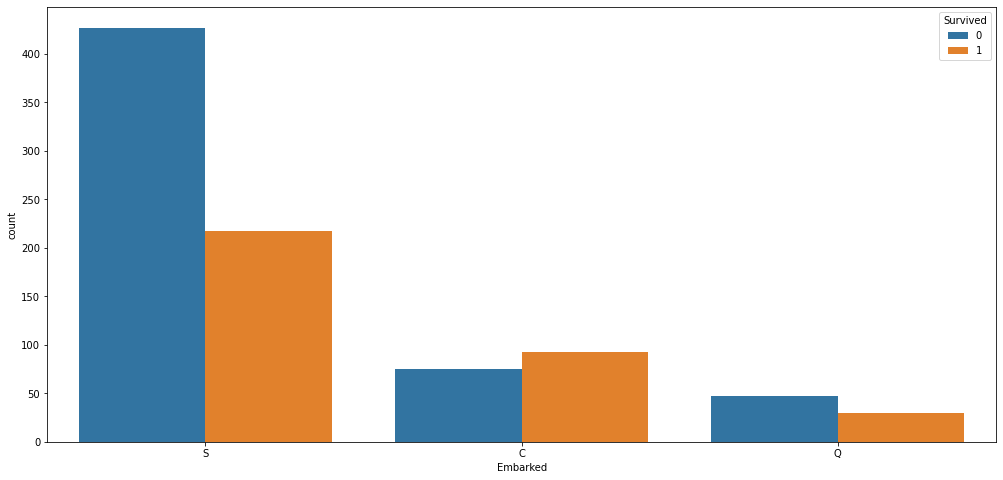

In [175]:
sns.countplot(data=test, x='Embarked', hue='Survived')

In [176]:
#Embarked 칼럼에서 결측치가 있는 데이터 확인
test[test.Embarked.isnull()]


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [177]:
#Embarked값이 S인 것 찾아주기
test[test.Embarked=='S'].head(6)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [178]:
#Embarked의 값이 null인 값을 S로 채워주기-방법1
test.loc[test.Embarked.isnull(), 'Embarked']='S'

#Embarked 칼럼에서 결측치가 있는 데이터 확인- 없으면 위 코드 잘 실행된 것
test[test.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [179]:
#null값을 S로 채워주기-방법2
test.Embarked=test.Embarked.fillna('S')
#Embarked 칼럼에서 결측치가 있는 데이터 확인- 없으면 위 코드 잘 실행된 것
test[test.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [180]:
#각각의 승선의 위치마다 승객이 몇명이 탔을까요? %로 나타내주세요
test.Embarked.value_counts()/test.shape[0]*100


S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='count'>

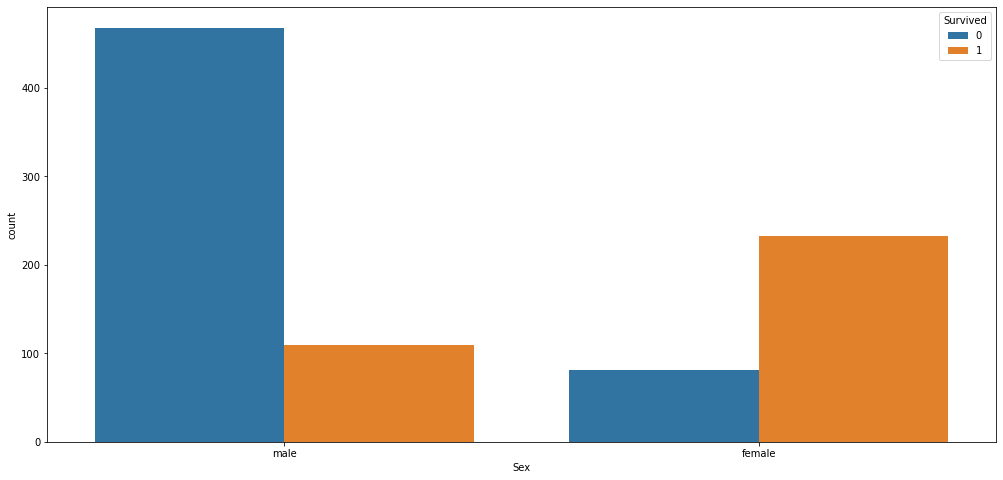

In [181]:
#성별에 따라 사람들이 얼마나 생존했는지 알고싶어요(시각화)
sns.countplot(data=test, x='Sex', hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

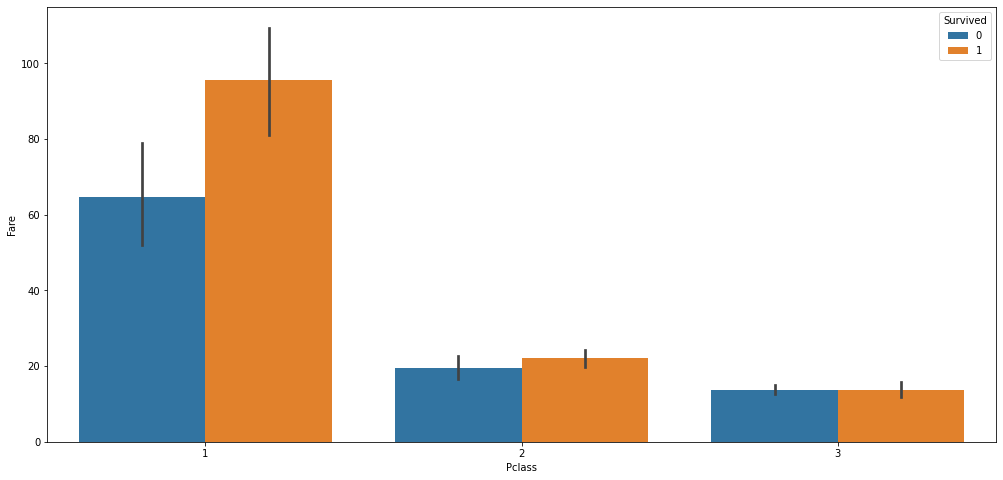

In [182]:
#x축: Pclass, y축: Fare hue: Survived
sns.barplot(data=test, x = 'Pclass', y='Fare', hue='Survived') 

In [183]:
#요금이 500불 이상인 사람의 데이터를 뽑아주세요
test[test.Fare>500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [184]:
#위 세명의 승객의 요금을 1/3으로 수정해주세요
test.loc[test.Fare>500, 'Fare']=512/3

#요금이 500불 이상인 사람의 데이터를 뽑아주세요-없으면 수정 완료
test[test.Fare>500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


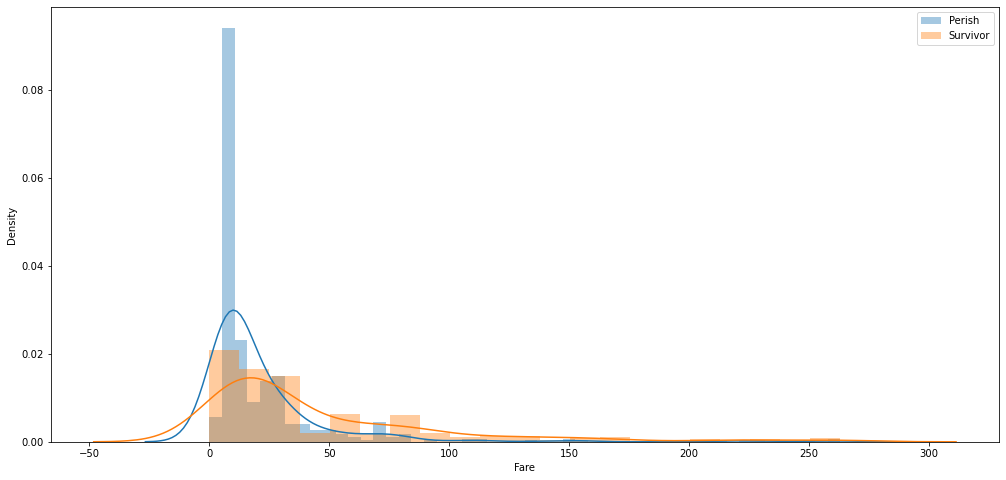

In [185]:
#생존자/비생존자의 distplot그리기
perish=test[test.Survived==0]
survivor=test[test.Survived==1]

sns.distplot(perish.Fare, label='Perish')
sns.distplot(survivor.Fare, label='Survivor')
plt.legend()

- lmplot

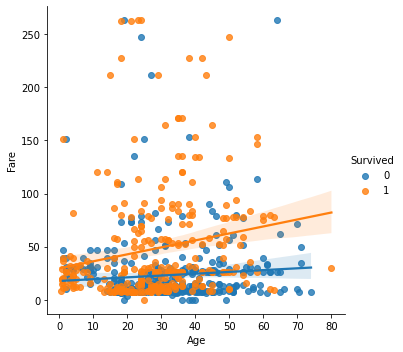

In [186]:
sns.lmplot(data=test, x='Age', y='Fare', hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

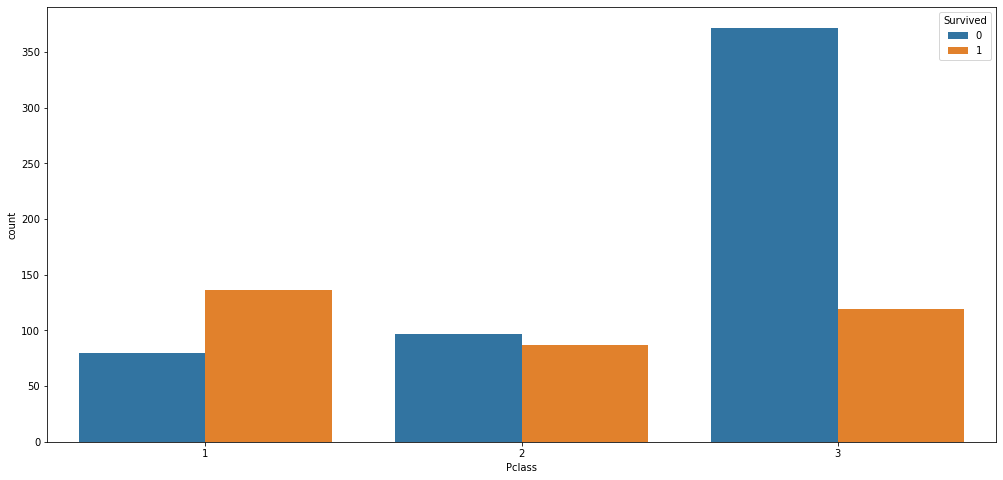

In [187]:
sns.countplot(data=test, x='Pclass', hue='Survived')

<AxesSubplot:xlabel='Sex', ylabel='count'>

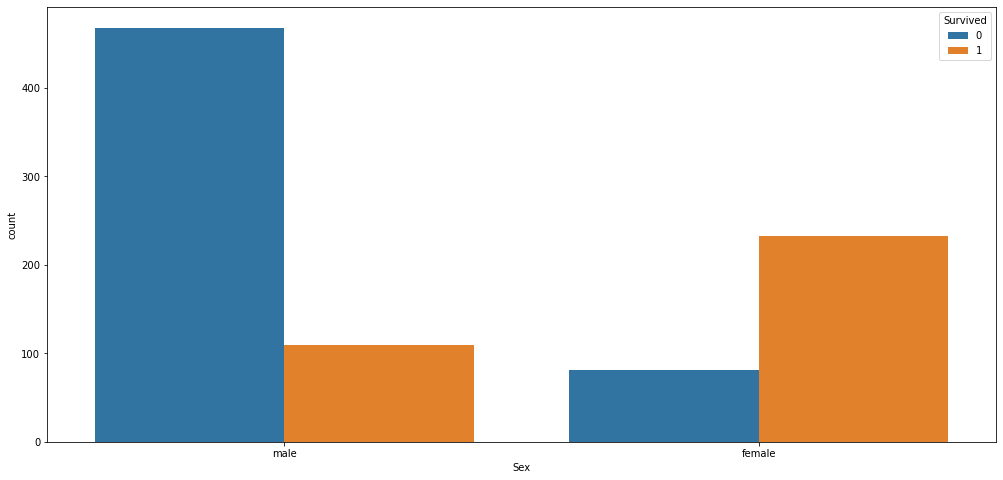

In [188]:
sns.countplot(data=test, x='Sex', hue='Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

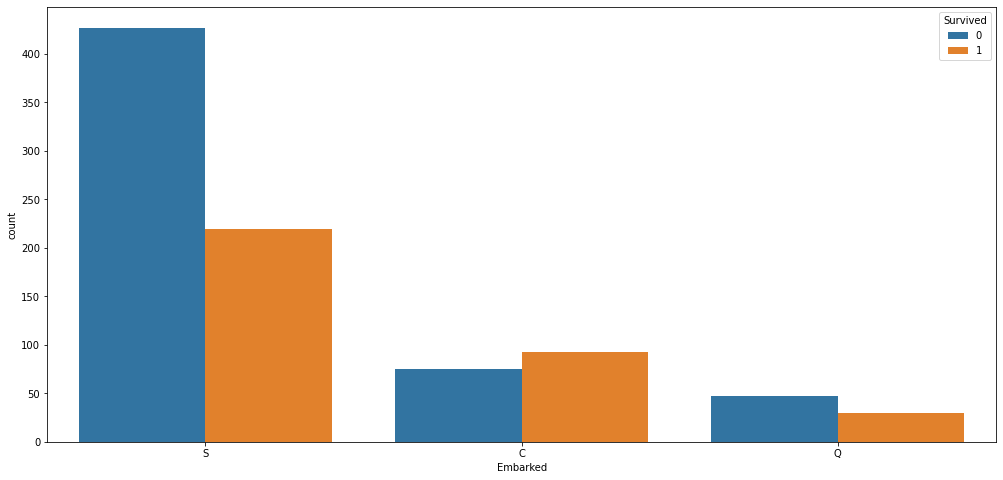

In [189]:
sns.countplot(data=test, x='Embarked', hue='Survived')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

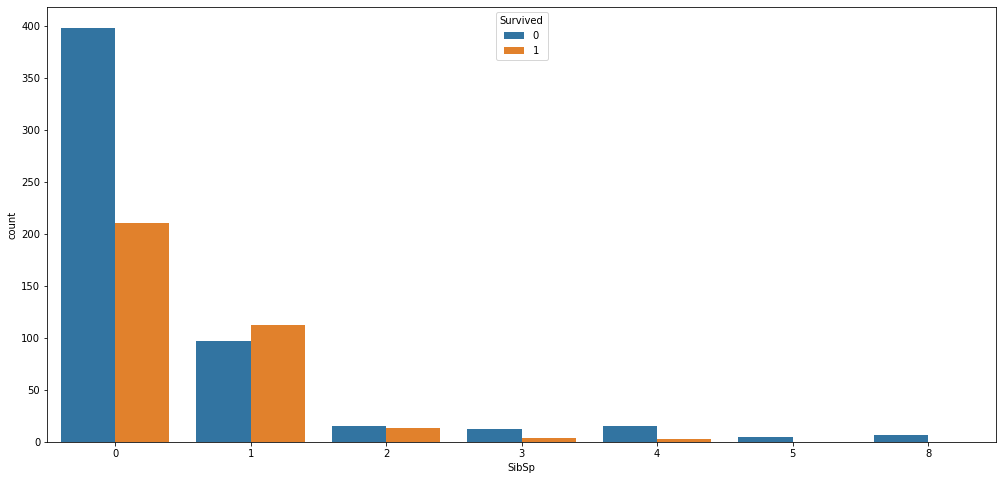

In [190]:
sns.countplot(data=test, x='SibSp', hue='Survived')

<AxesSubplot:xlabel='Parch', ylabel='count'>

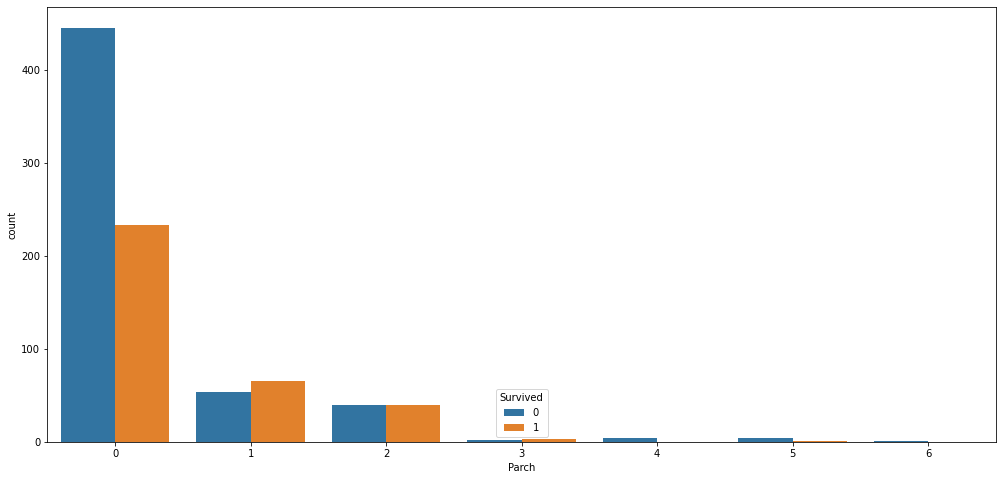

In [191]:
sns.countplot(data=test, x='Parch', hue='Survived')

<AxesSubplot:xlabel='Age', ylabel='count'>

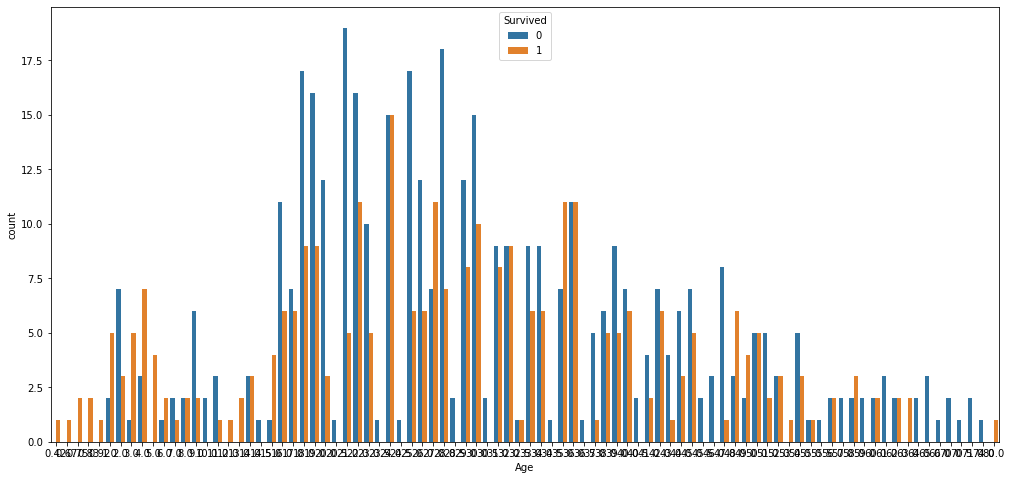

In [192]:
sns.countplot(data=test, x='Age', hue='Survived')

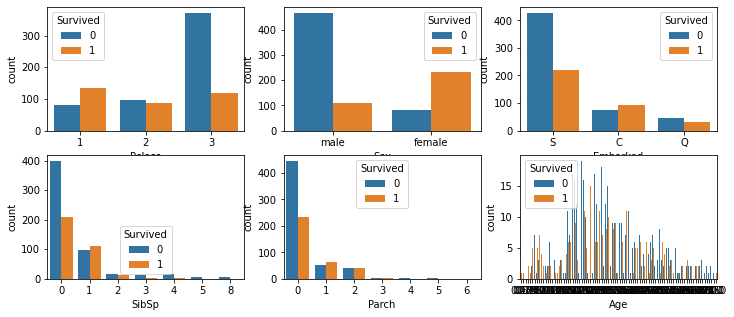

In [196]:
#위의 6개의 그래프를 한번에 출력
#     figure 이름들                            행수:2 열수:3
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(12, 5))

sns.countplot(data=test, x='Pclass', hue='Survived', ax=ax1)
sns.countplot(data=test, x='Sex', hue='Survived', ax=ax2)
sns.countplot(data=test, x='Embarked', hue='Survived', ax=ax3)
sns.countplot(data=test, x='SibSp', hue='Survived', ax=ax4)
sns.countplot(data=test, x='Parch', hue='Survived', ax=ax5)
sns.countplot(data=test, x='Age', hue='Survived', ax=ax6)

#저장하기
#plt.savefig('titanic.png')
plt.savefig('titanic.pdf')

In [202]:
#SibSp, Parch->Family_size라는 칼럼을 추가해주기
test['Family_size']=test.SibSp+test.Parch
test.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


In [208]:
#Family_size를 가지고 0이면 Alone이라는 칼럼에 1이라고 기록, 0이 아니면 Alone컬럼에 0이라고 기록하기
test.loc[test.Family_size==0, 'Alone']='1'
test.loc[test.Family_size!=0, 'Alone']='0'
test.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Alone
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


<AxesSubplot:xlabel='Family_size', ylabel='count'>

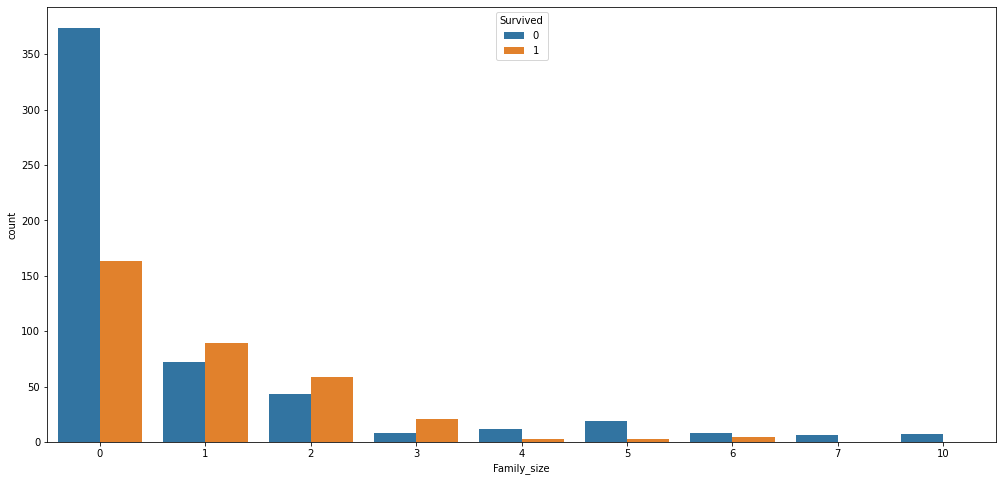

In [209]:
sns.countplot(data=test, x='Family_size', hue='Survived')